In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [42]:
def sigmoid(x):
    return  1.0 / (1.0 + np.exp(-x))

In [43]:
x1_label1 = np.random.normal(-3,1,1000)
x2_label1 = np.random.normal(2,1,1000)
x1_label2 = np.random.normal(7,1,1000)
x2_label2 = np.random.normal(6,1,1000)

x1s = np.append(x1_label1,x1_label2)
x2s = np.append(x2_label1,x2_label2)
ys = np.asarray([0.0] * len(x1_label1) + [1.0] * len(x1_label2))

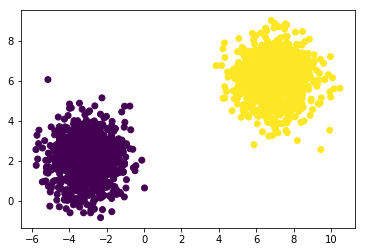

In [71]:
plt.scatter(x1s,x2s,c=ys)

In [53]:
learning_rate = 0.1
training_epoch = 2000

In [54]:
X1 = tf.placeholder(tf.float32, shape=(None,), name="x1")
X2 = tf.placeholder(tf.float32, shape=(None,), name="x2")
Y = tf.placeholder(tf.float32, shape=(None,), name="y")
w = tf.Variable([0.0,0.0,0.0], name="w", trainable=True)

def model(X1,X2,w):
    return tf.sigmoid(tf.add(tf.add(tf.multiply(X1,w[1]),tf.multiply(X2,w[2])),w[0]))
y_model = model(X1,X2,w)

cost = tf.reduce_mean(-tf.log(y_model * Y + (1.0 - y_model) * (1.0 - Y)))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_err = 0
    for epoch in range(training_epoch):
        err,_ = sess.run([cost,train_op], feed_dict={X1:x1s,X2:x2s,Y:ys})
        if abs(prev_err - err) < 0.0001:
            break
        prev_err = err
    w_val = sess.run(w,feed_dict={X1:x1s,X2:x2s,Y:ys})
print(w_val)

[-0.26606905  1.2387552  -0.2512019 ]


In [98]:
def non_tf_model(X1,X2,W):
    return sigmoid(X1*W[1] + X2*W[2] + W[0])

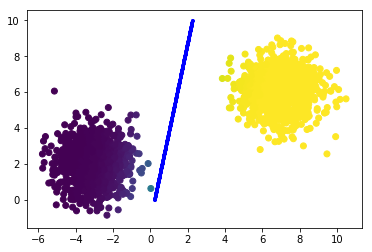

In [99]:
plt.scatter(x1_bounds,x2_bounds,c='b', s=1)
plt.scatter(x1s,x2s,c=non_tf_model(x1s,x2s,w_val))

plt.show()